**Step 1:**
**Importing the necessary Modules**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

**Importing the dataset:**

In [3]:
dataset = pd.read_csv('dataset.csv')

**Performing data preprocessing:**

In [4]:
#generalizing the column names
dataset.columns = dataset.columns.str.strip().str.replace(' ','_').str.lower()

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#extracting the date column and adding a separate column for year and month

In [17]:
dataset.sort_values(by='date',inplace=True, ascending=True)

**We're using Prophet model for predicting the future values**

In [ ]:
model = Prophet()

In [18]:
routes = ['local_route', 'light_rail', 'peak_service', 'rapid_route', 'school']
forecasts = {}
for route in routes:
    dataset_route = dataset[['date', route]].rename(columns={'date': 'ds', route: 'y'})
    model = Prophet()
    model.fit(dataset_route)
    
    future = model.make_future_dataframe(periods=7,freq='D')
    forecast = model.predict(future)
    
    forecasts[route] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

11:54:35 - cmdstanpy - INFO - Chain [1] start processing
11:54:35 - cmdstanpy - INFO - Chain [1] done processing
11:54:36 - cmdstanpy - INFO - Chain [1] start processing
11:54:37 - cmdstanpy - INFO - Chain [1] done processing
11:54:38 - cmdstanpy - INFO - Chain [1] start processing
11:54:38 - cmdstanpy - INFO - Chain [1] done processing
11:54:39 - cmdstanpy - INFO - Chain [1] start processing
11:54:39 - cmdstanpy - INFO - Chain [1] done processing
11:54:40 - cmdstanpy - INFO - Chain [1] start processing
11:54:40 - cmdstanpy - INFO - Chain [1] done processing


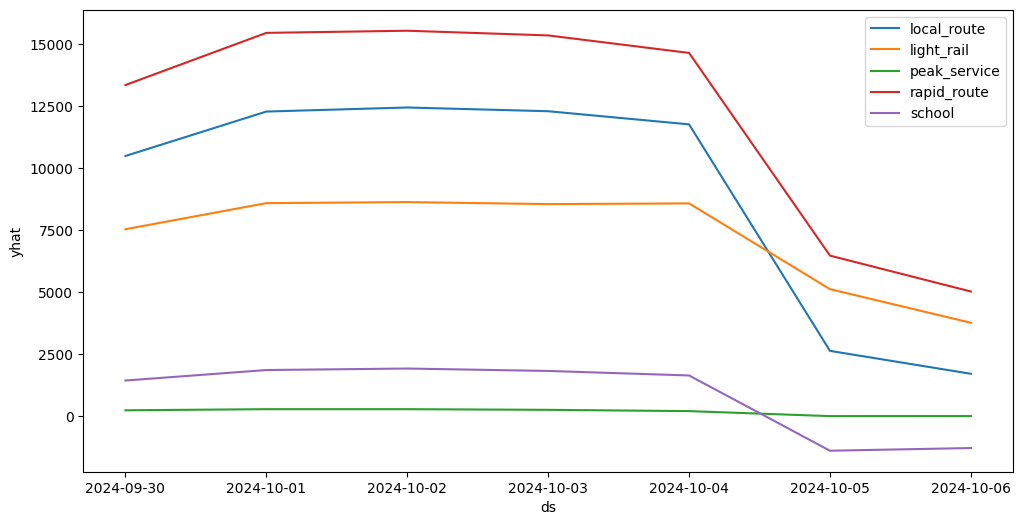

In [27]:
plt.figure(figsize=(12, 6)) 
for route, forecast in forecasts.items():
    sns.lineplot(x='ds', y='yhat', data=forecast.tail(7), label=route)

**These are the predicted values for the next 7 days**